Guilherme Fernandes Alves - 10774361

# Problema 7 - ANEXO

Abaixo temos o código responsável pela modelagem do exercício 7, escrito em linguagem de programação Python e que utiliza o CPLEX como solver.

O código resolve um TSP para diferentes tamanhos de problemas (com n entre 4 e 104 clientes) usando formulação de Danzig-Fulkerson-Johnson e abordagem por meio do problema de transbordo.

In [36]:
from docplex.mp.model import Model
import random

# fix the seed (ensure the same results every time we run the code)
random.seed(0)


def create_distance_matrix(n: int) -> list[list[int]]:
    # create a NxN matrix filled with random distances. The diagonal is an infinite distance
    c = [[random.randint(1, 100) for j in range(n)] for i in range(n)]
    for i in range(n):
        c[i][i] = 999999999
    return c


def modelo_danzig(distance_matrix):
    n = len(distance_matrix)
    mdl = Model(name="TSP_danzig")

    # Variables
    x = mdl.binary_var_matrix(range(n), range(n), name="x")

    # Objective function
    mdl.minimize(
        mdl.sum(distance_matrix[i][j] * x[i, j] for i in range(n) for j in range(n))
    )

    # Constraints
    ## Each city is visited exactly once
    for i in range(n):
        mdl.add_constraint(mdl.sum(x[i, j] for j in range(n)) == 1)

    ## Each city is left exactly once
    for j in range(n):
        mdl.add_constraint(mdl.sum(x[i, j] for i in range(n)) == 1)

    ## Avoid subtours
    Q = mdl.integer_var_list(n, 0, n - 1, name="Q")
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                mdl.add_constraint(Q[i] - Q[j] + n * x[i, j] <= n - 1)

    # Solve
    mdl.solve()

    return {
        "exec_time": mdl.solve_details.time,
        "num_constraints": int(mdl.number_of_constraints),
        "solution": mdl.solution,
    }


def modelo_mtz(distance_matrix):
    n = len(distance_matrix)
    M = 100000000

    mdl = Model(name="TSP_mtz")

    # Variables
    x = mdl.binary_var_matrix(range(n), range(n), name="x")

    # Objective function
    mdl.minimize(
        mdl.sum(distance_matrix[i][j] * x[i, j] for i in range(n) for j in range(n))
    )

    # Constraints
    ## Each city is visited exactly once
    for i in range(n):
        mdl.add_constraint(mdl.sum(x[i, j] for j in range(n)) == 1)

    ## Each city is left exactly once
    for j in range(n):
        mdl.add_constraint(mdl.sum(x[i, j] for i in range(n)) == 1)

    ## Avoid subtours
    y = mdl.integer_var_matrix(range(n), range(n), name="y")

    ### 1
    mdl.add_constraint(mdl.sum(y[1, j] for j in range(1, n)) == n - 1)

    ### 2
    mdl.add_constraint(
        -1
        == mdl.sum(y[i, j] for j in range(1, n) for i in range(2, n) if i != j)
        - mdl.sum(y[k, i] for k in range(1, n) for i in range(2, n) if i != k)
    )

    ### 3
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                mdl.add_constraint(y[i, j] <= M * x[i, j])

    # Solve
    mdl.solve()

    return {
        "exec_time": mdl.solve_details.time,
        "num_constraints": int(mdl.number_of_constraints),
        "solution": mdl.solution,
    }


n_max = 102
numero_clientes = list(range(4, n_max, 5))

resultados_danzig = {}
resultados_mtz = {}

for n in numero_clientes:
    print(f"n = {n}/{n_max}")
    d_matrix = create_distance_matrix(n)

    resultados_danzig[n] = {}
    resultados_mtz[n] = {}

    res = modelo_danzig(d_matrix)
    resultados_danzig[n]["time"] = res["exec_time"]
    resultados_danzig[n]["num_restricoes"] = res["num_constraints"]

    res = modelo_mtz(d_matrix)
    resultados_mtz[n]["time"] = res["exec_time"]
    resultados_mtz[n]["num_restricoes"] = res["num_constraints"]




################################################################################
###### As próximas linhas servem apenas para visualização dos resultados #######
################################################################################

# create dataframes with resultados_danzig, resultados_mtz

import pandas as pd

df_danzig = pd.DataFrame(resultados_danzig).T
df_mtz = pd.DataFrame(resultados_mtz).T

# forca inteiros para os valores de num_restricoes
df_danzig["num_restricoes"] = df_danzig["num_restricoes"].astype(int)
df_mtz["num_restricoes"] = df_mtz["num_restricoes"].astype(int)

df_danzig.to_csv("resultados_danzig.csv")
df_mtz.to_csv("resultados_mtz.csv")

# display(df_danzig)
# display(df_mtz)

# merge dataframes with good columns names, same index
df = pd.concat([df_danzig, df_mtz], axis=1, keys=["danzig", "mtz"])
df.columns = df.columns.map(lambda x: "_".join(x))

df

n = 4/102
n = 9/102
n = 14/102
n = 19/102
n = 24/102
n = 29/102
n = 34/102
n = 39/102
n = 44/102
n = 49/102
n = 54/102
n = 59/102
n = 64/102
n = 69/102
n = 74/102
n = 79/102
n = 84/102
n = 89/102
n = 94/102
n = 99/102


,danzig_time,danzig_num_restricoes,mtz_time,mtz_num_restricoes
4,0.016,14,0.015,16
9,0.000,74,0.015,76
14,0.032,184,0.016,186
19,0.016,344,0.016,346
24,0.031,554,0.016,556
29,0.125,814,0.031,816
34,0.125,1124,0.015,1126
39,0.125,1484,0.031,1486
44,0.234,1894,0.032,1896
49,0.156,2354,0.031,2356


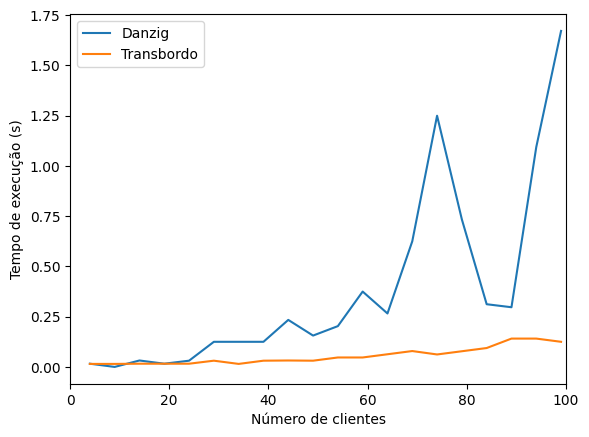

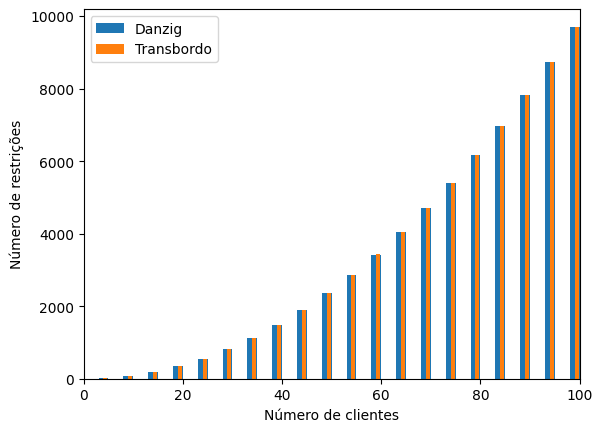

In [37]:
import matplotlib.pyplot as plt


# plot N x time with both plots
plt.plot(df.index, df["danzig_time"], label="Danzig")
plt.plot(df.index, df["mtz_time"], label="Transbordo")
plt.xlabel("Número de clientes")
plt.ylabel("Tempo de execução (s)")
plt.legend()
plt.xlim(0, 100)
plt.show()

# plot N x num_restricoes with both plots
plt.bar(df.index, df["danzig_num_restricoes"], label="Danzig", align="center", width=2)
plt.bar(df.index, df["mtz_num_restricoes"], label="Transbordo", align="edge")
plt.xlabel("Número de clientes")
plt.ylabel("Número de restrições")
plt.legend()
plt.xlim(0, 100)
plt.show()